In [1]:
%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

from matplotlib import pyplot as plt
from matplotlib import cm,colors
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import scipy as sp
from scipy.spatial import cKDTree
import pickle

from piff.des.decaminfo import DECamInfo
dinfo = DECamInfo()

from donutlib.decamutil import decaminfo 
ddinfo = decaminfo()

from scriptUtil import decodeNumberList

from pixmappy import DESMaps, Gnomonic, GalSimWCS
from meshutil import mkDonutAnaDF

Welcome to JupyROOT 6.20/04


# pixmappy notes

The tree rings are in the astrorings4.yaml file (find it in the pixmappy/pixmappy/data directory!)
The Parameter value in the zone176.yaml is a scale factor for the Astrometry from tree rings. Has value of -.9825, -.9779, -.892, -.606 for S29 g,r,i,z - so tree ring effect gets smaller in the Red end,but the tree rings have the same overall location and relative amplitude

In [52]:
if False:
#
# run jobs...
# submit jobs to make PixelSizes
# use image number to select Band...228724 is i band, 228723 is r band, 232716 is z band, 228725 is g band
# 
    import os
    expnum = [228724,228723,232716,228725]
    band = ['i','r','z','g'] 
    for i in range(4):
        for ccdname in ccdnames:
            command = "bsub -C 0  -W 1:00 -R select[rhel60] -o pixsize/%s_%sBand.log ./calcPixelSize.py -c %s -e %d -o pixsize/%s_%sBand.pkl" % (ccdname,band[i],ccdname,expnum[i],ccdname,band[i])
            os.system(command)
            print(command)

bsub -C 0  -W 1:00 -R select[rhel60] -o pixsize/S1_iBand.log ./calcPixelSize.py -c S1 -e 228724 -o pixsize/S1_iBand.pkl
bsub -C 0  -W 1:00 -R select[rhel60] -o pixsize/S2_iBand.log ./calcPixelSize.py -c S2 -e 228724 -o pixsize/S2_iBand.pkl
bsub -C 0  -W 1:00 -R select[rhel60] -o pixsize/S3_iBand.log ./calcPixelSize.py -c S3 -e 228724 -o pixsize/S3_iBand.pkl
bsub -C 0  -W 1:00 -R select[rhel60] -o pixsize/S4_iBand.log ./calcPixelSize.py -c S4 -e 228724 -o pixsize/S4_iBand.pkl
bsub -C 0  -W 1:00 -R select[rhel60] -o pixsize/S5_iBand.log ./calcPixelSize.py -c S5 -e 228724 -o pixsize/S5_iBand.pkl
bsub -C 0  -W 1:00 -R select[rhel60] -o pixsize/S6_iBand.log ./calcPixelSize.py -c S6 -e 228724 -o pixsize/S6_iBand.pkl
bsub -C 0  -W 1:00 -R select[rhel60] -o pixsize/S7_iBand.log ./calcPixelSize.py -c S7 -e 228724 -o pixsize/S7_iBand.pkl
bsub -C 0  -W 1:00 -R select[rhel60] -o pixsize/S8_iBand.log ./calcPixelSize.py -c S8 -e 228724 -o pixsize/S8_iBand.pkl
bsub -C 0  -W 1:00 -R select[rhel60] -o 

bsub -C 0  -W 1:00 -R select[rhel60] -o pixsize/S7_rBand.log ./calcPixelSize.py -c S7 -e 228723 -o pixsize/S7_rBand.pkl
bsub -C 0  -W 1:00 -R select[rhel60] -o pixsize/S8_rBand.log ./calcPixelSize.py -c S8 -e 228723 -o pixsize/S8_rBand.pkl
bsub -C 0  -W 1:00 -R select[rhel60] -o pixsize/S9_rBand.log ./calcPixelSize.py -c S9 -e 228723 -o pixsize/S9_rBand.pkl
bsub -C 0  -W 1:00 -R select[rhel60] -o pixsize/S10_rBand.log ./calcPixelSize.py -c S10 -e 228723 -o pixsize/S10_rBand.pkl
bsub -C 0  -W 1:00 -R select[rhel60] -o pixsize/S11_rBand.log ./calcPixelSize.py -c S11 -e 228723 -o pixsize/S11_rBand.pkl
bsub -C 0  -W 1:00 -R select[rhel60] -o pixsize/S12_rBand.log ./calcPixelSize.py -c S12 -e 228723 -o pixsize/S12_rBand.pkl
bsub -C 0  -W 1:00 -R select[rhel60] -o pixsize/S13_rBand.log ./calcPixelSize.py -c S13 -e 228723 -o pixsize/S13_rBand.pkl
bsub -C 0  -W 1:00 -R select[rhel60] -o pixsize/S14_rBand.log ./calcPixelSize.py -c S14 -e 228723 -o pixsize/S14_rBand.pkl
bsub -C 0  -W 1:00 -R sel

bsub -C 0  -W 1:00 -R select[rhel60] -o pixsize/S13_zBand.log ./calcPixelSize.py -c S13 -e 232716 -o pixsize/S13_zBand.pkl
bsub -C 0  -W 1:00 -R select[rhel60] -o pixsize/S14_zBand.log ./calcPixelSize.py -c S14 -e 232716 -o pixsize/S14_zBand.pkl
bsub -C 0  -W 1:00 -R select[rhel60] -o pixsize/S15_zBand.log ./calcPixelSize.py -c S15 -e 232716 -o pixsize/S15_zBand.pkl
bsub -C 0  -W 1:00 -R select[rhel60] -o pixsize/S16_zBand.log ./calcPixelSize.py -c S16 -e 232716 -o pixsize/S16_zBand.pkl
bsub -C 0  -W 1:00 -R select[rhel60] -o pixsize/S17_zBand.log ./calcPixelSize.py -c S17 -e 232716 -o pixsize/S17_zBand.pkl
bsub -C 0  -W 1:00 -R select[rhel60] -o pixsize/S18_zBand.log ./calcPixelSize.py -c S18 -e 232716 -o pixsize/S18_zBand.pkl
bsub -C 0  -W 1:00 -R select[rhel60] -o pixsize/S19_zBand.log ./calcPixelSize.py -c S19 -e 232716 -o pixsize/S19_zBand.pkl
bsub -C 0  -W 1:00 -R select[rhel60] -o pixsize/S20_zBand.log ./calcPixelSize.py -c S20 -e 232716 -o pixsize/S20_zBand.pkl
bsub -C 0  -W 1:

bsub -C 0  -W 1:00 -R select[rhel60] -o pixsize/S19_gBand.log ./calcPixelSize.py -c S19 -e 228725 -o pixsize/S19_gBand.pkl
bsub -C 0  -W 1:00 -R select[rhel60] -o pixsize/S20_gBand.log ./calcPixelSize.py -c S20 -e 228725 -o pixsize/S20_gBand.pkl
bsub -C 0  -W 1:00 -R select[rhel60] -o pixsize/S21_gBand.log ./calcPixelSize.py -c S21 -e 228725 -o pixsize/S21_gBand.pkl
bsub -C 0  -W 1:00 -R select[rhel60] -o pixsize/S22_gBand.log ./calcPixelSize.py -c S22 -e 228725 -o pixsize/S22_gBand.pkl
bsub -C 0  -W 1:00 -R select[rhel60] -o pixsize/S23_gBand.log ./calcPixelSize.py -c S23 -e 228725 -o pixsize/S23_gBand.pkl
bsub -C 0  -W 1:00 -R select[rhel60] -o pixsize/S24_gBand.log ./calcPixelSize.py -c S24 -e 228725 -o pixsize/S24_gBand.pkl
bsub -C 0  -W 1:00 -R select[rhel60] -o pixsize/S25_gBand.log ./calcPixelSize.py -c S25 -e 228725 -o pixsize/S25_gBand.pkl
bsub -C 0  -W 1:00 -R select[rhel60] -o pixsize/S26_gBand.log ./calcPixelSize.py -c S26 -e 228725 -o pixsize/S26_gBand.pkl
bsub -C 0  -W 1:

# tree rings

In [5]:
import yaml
rings = yaml.safe_load(open("/u/ec/roodman/kipacdisk/Software/pixmappy/pixmappy/data/astrorings4.yaml",'r'))

In [7]:
print(rings['S29'].keys())

dict_keys(['ArgStart', 'ArgStep', 'Axis', 'Values', 'XCenter', 'YCenter'])


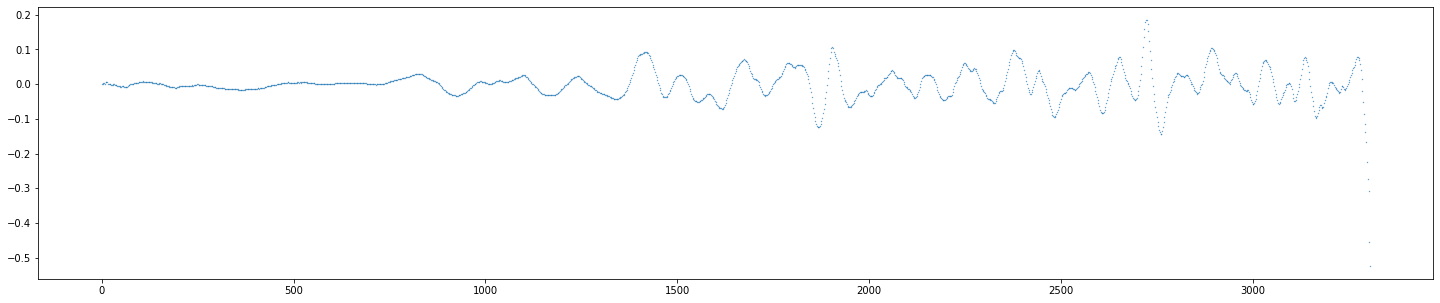

In [14]:
f,ax = plt.subplots(figsize=(25,5))
values = rings['S29']['Values']
n = len(values)
radii = rings['S29']['ArgStart'] + rings['S29']['ArgStep']*np.arange(n) 

ax.scatter(radii,values,marker='.',s=0.4)

In [15]:
# get Meshes and a DonutAna object - but set nInterpGrid to 128 (usually just 32)
dfDirectory = "/u/ec/roodman/Astrophysics/Donuts/ComboMeshesZemaxIteration2v22"
dfName = "ComboMesh_Science-20140212s2-v22i2_All"
zVarPattern="z%dcorr"
usedFlag=True
minDict={4:-20.,5:-0.2,6:-0.2,7:-0.125,8:-0.125,9:-0.3,10:-0.3,11:-0.15,14:-0.1,15:-0.1}
maxDict={4:20.,5:0.2,6:0.2,7:0.125,8:0.125,9:0.3,10:0.3,11:0.15,14:0.1,15:0.1}

iZs = [4]
da = mkDonutAnaDF(dfDirectory+"/"+dfName+".pkl",iZs,zVarPattern=zVarPattern,sensorSet="ScienceOnly",method="idw",methodVal=(250,1.0),nInterpGrid=128,donutCutString="flagFinal==True")
        
for iZ in iZs:
    print(iZ)
    meshN = "z%dMesh" % (iZ)
    if meshN in da.meshDict:
        aMesh = da.meshDict[meshN]
        X_all,Y_all,Xcen_all,Ycen_all,Z_all,ZVig_all = aMesh.calcMeshMPL2D()




4


In [16]:
ccdnames = da.meshDict['z4Mesh'].coordList

In [54]:
# load the pickles, and write out a summary pickle
band = ['g','r','i','z']
for aband in band:
    
    PixelSize_all = {}
    for ccdname in ccdnames:
        try:
            d = pickle.load(open('pixsize/%s_%sBand.pkl' % (ccdname,aband),'rb'))
            PixelSize_all[ccdname] = d[ccdname]
        except:
            print(ccdname)
        
        
    # dump out the fov_x,fov_y and pix_area in a dictionary keyed by ccdnum

    fov_x = {}
    fov_y = {}
    pix_area = {}

    factor = 0.263/0.015

    for iCoord in PixelSize_all.keys():
        ccdnum = dinfo.infoDict[iCoord]['CCDNUM']
        fov_x[ccdnum] = X_all[iCoord] * factor
        fov_y[ccdnum] = Y_all[iCoord] * factor
        pix_area[ccdnum] = PixelSize_all[iCoord]

    outlist = [fov_x,fov_y,pix_area]

    # write to a pkl file
    pickle_file = "pixmappy_pix_area_%sband.pkl" % (aband)
    f = open(pickle_file,'wb')
    pickle.dump(outlist, f)
    f.close()

N30
N30
N30
N30


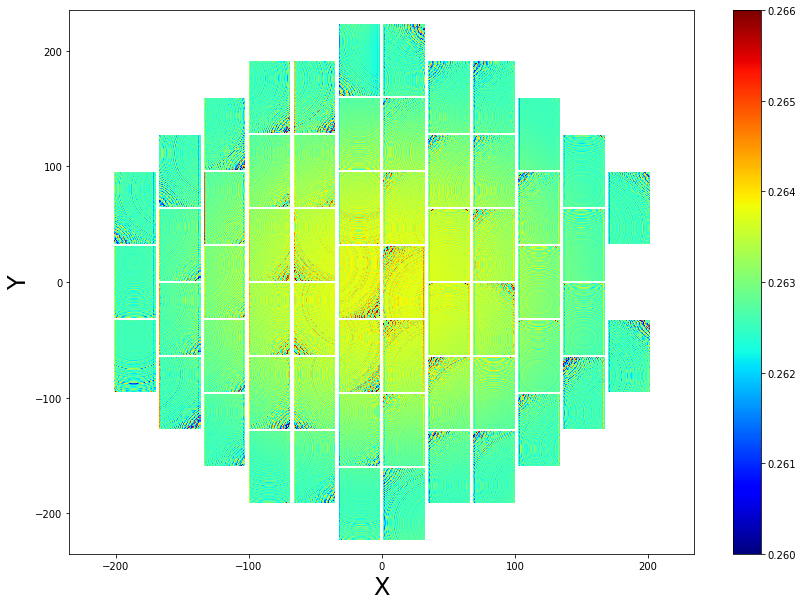

In [13]:
# plots
zmin = 0.26
zmax = 0.266
anorm = colors.Normalize(zmin,zmax,True)
cmap=cm.jet
f,ax = plt.subplots(1,1,figsize=(14,10))
    
# hard code X,Y limits to be DECam boundaries
minX = -235.
maxX = 235.
minY = -235.
maxY = 235.

for iCoord in PixelSize_all.keys():
    cset = ax.pcolormesh(X_all[iCoord], Y_all[iCoord], np.sqrt(PixelSize_all[iCoord]), cmap=cmap, norm=anorm)
    
ax.set_xlabel('X',fontsize=24)
ax.set_xlim(minX, maxX)
ax.set_ylabel('Y',fontsize=24)
ax.set_ylim(minY, maxY)

# add the colorbar
f.colorbar(cset,ax=ax)

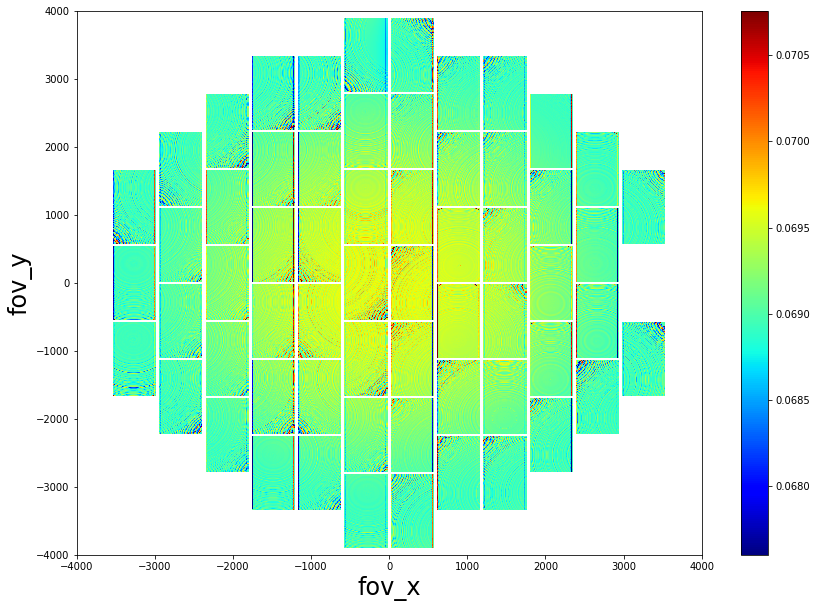

In [55]:
pickle_file = "/u/ec/roodman/kipacdisk/Piff/pixmappy_pix_area_iband.pkl"
[fov_x_in,fov_y_in,pix_area_in] = pickle.load(open(pickle_file, "rb"))

zmin = 0.26 * 0.26
zmax = 0.266 * 0.266
anorm = colors.Normalize(zmin,zmax,True)
cmap=cm.jet
f,ax = plt.subplots(1,1,figsize=(14,10))
    
for iCoord in PixelSize_all.keys():
    ccdnum = dinfo.infoDict[iCoord]['CCDNUM']
    cset = ax.pcolormesh(fov_x_in[ccdnum], fov_y_in[ccdnum], pix_area_in[ccdnum] , cmap=cmap, norm=anorm)
    
ax.set_xlabel('fov_x',fontsize=24)
ax.set_ylabel('fov_y',fontsize=24)
ax.set_xlim(-4000., 4000.)
ax.set_ylim(-4000., 4000.)

# add the colorbar
f.colorbar(cset,ax=ax)

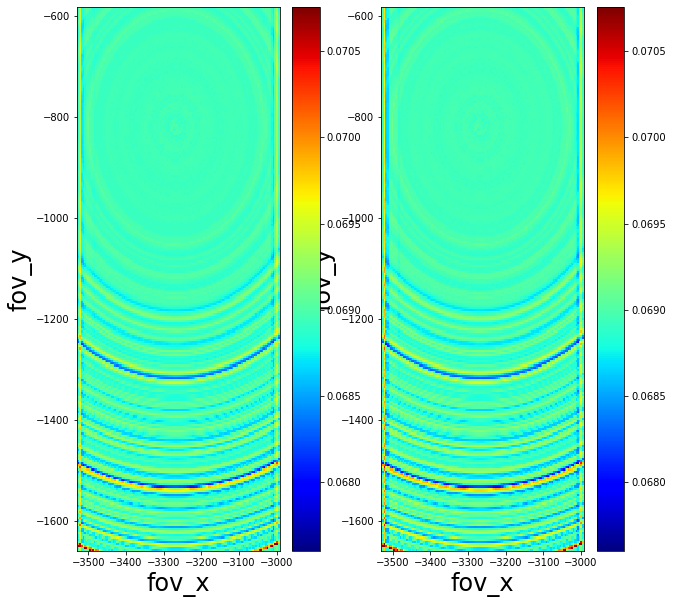

In [58]:
zmin = 0.26 * 0.26
zmax = 0.266 * 0.266
anorm = colors.Normalize(zmin,zmax,True)
cmap=cm.jet
f,ax = plt.subplots(1,2,figsize=(10,10))
   
pickle_file = "/u/ec/roodman/kipacdisk/Piff/pixmappy_pix_area_iband.pkl"
[fov_x_in,fov_y_in,pix_area_in] = pickle.load(open(pickle_file, "rb"))    
ccdnum = 1  # S29
cset = ax[0].pcolormesh(fov_x_in[ccdnum], fov_y_in[ccdnum], pix_area_in[ccdnum] , cmap=cmap, norm=anorm)    
ax[0].set_xlabel('fov_x',fontsize=24)
ax[0].set_ylabel('fov_y',fontsize=24)
# add the colorbar
f.colorbar(cset,ax=ax[0])

pickle_file = "/u/ec/roodman/kipacdisk/Piff/pixmappy_pix_area_rband.pkl"
[fov_x_in,fov_y_in,pix_area_in] = pickle.load(open(pickle_file, "rb"))    
ccdnum = 1  # S29
cset = ax[1].pcolormesh(fov_x_in[ccdnum], fov_y_in[ccdnum], pix_area_in[ccdnum] , cmap=cmap, norm=anorm)    
ax[1].set_xlabel('fov_x',fontsize=24)
ax[1].set_ylabel('fov_y',fontsize=24)
# add the colorbar
f.colorbar(cset,ax=ax[1])

In [46]:
iCCD = 1
xs = fov_x_in[iCCD]
ys = fov_y_in[iCCD]
pa = pix_area_in[iCCD]
ny,nx = pa.shape
print(pa.shape)

xlist = []
ylist = []
palist = []
edge = 6
for iy in range(edge,ny-edge):
    for ix in range(edge,nx-edge):
        palist.append(pa[iy,ix])
        xlist.append( (xs[iy,ix]+xs[iy,ix+1])/2. )
        ylist.append( (ys[iy,ix]+ys[iy+1,ix])/2. )


## Converting the center of the tree rings from pixel space to fov space
# units is 0.263 arcsec/pixel and 0.015 mm/pixel
factor = 0.263 / 0.015
# ix,iy are pixel number (probably starts at 1 not 0)
# the units on these after the conversion are in "
fov_x, fov_y = ddinfo.getPositionByNum(iCCD, 1004.08, 3196.22)

fov_x = fov_x * factor
fov_y = fov_y * factor

print(fov_x,fov_y)

rlist = np.sqrt((np.array(xlist)-fov_x)**2+(np.array(ylist)-fov_y)**2)/0.263


(256, 128)
-3266.0970600000005 -818.0913066666668


(0.068, 0.07)

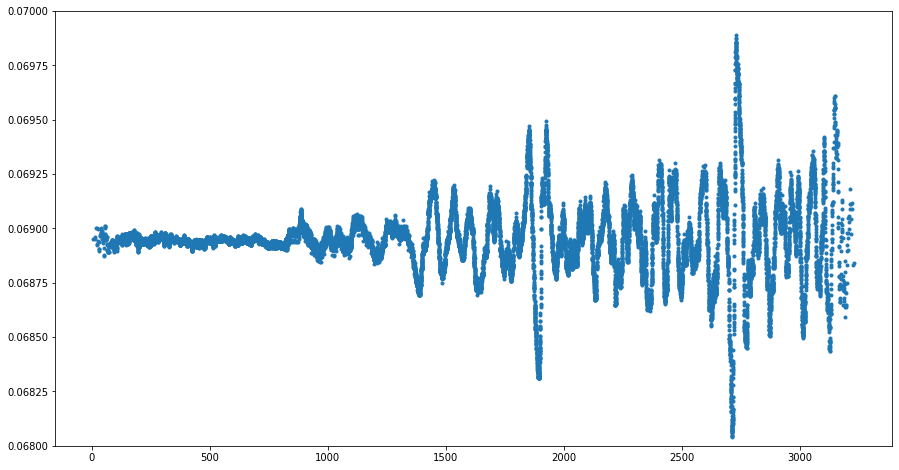

In [47]:
f,ax = plt.subplots(figsize=(15,8))
ax.scatter(rlist,palist,marker='.')
ax.set_ylim(0.068,0.070)

# DONE should cut out the edges of the CCD, where the edge effects produce additional change in pixel-size, not due to tree-rings

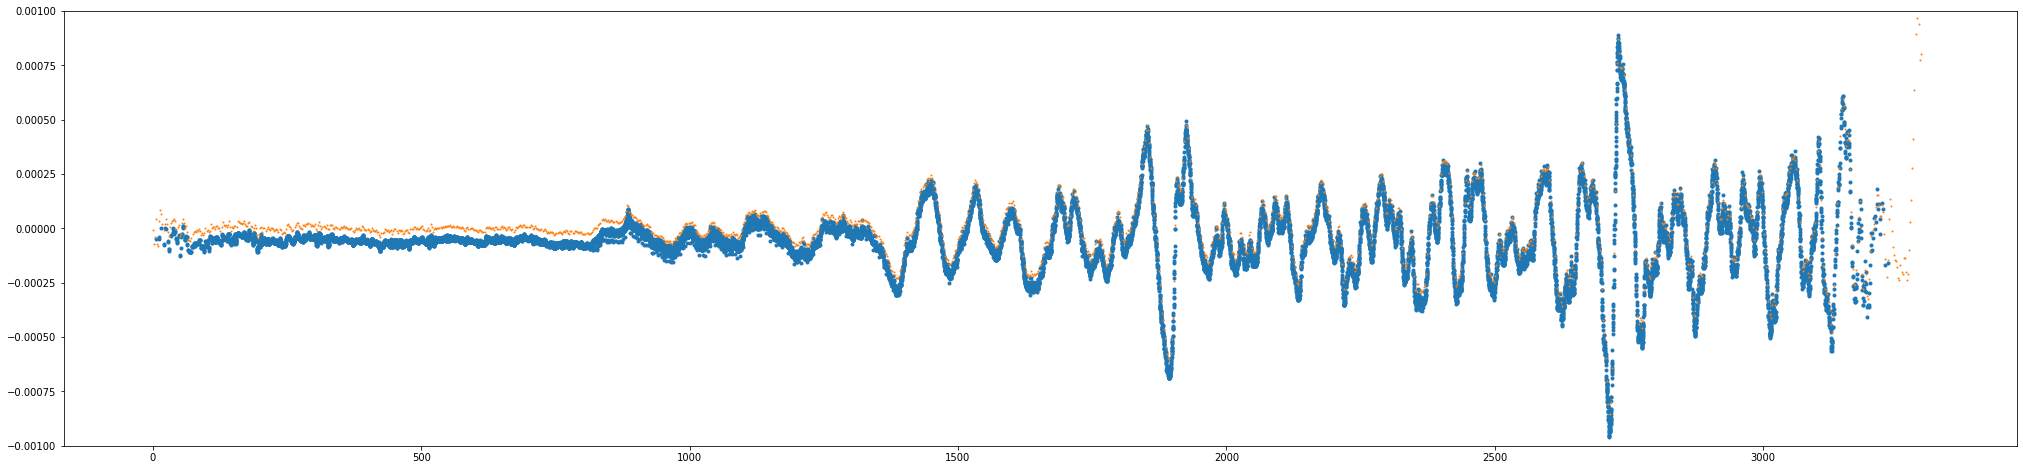

In [51]:
f,ax = plt.subplots(figsize=(35,8))
ax.scatter(rlist,np.array(palist)-(0.069),marker='.')
ax.set_ylim(-0.001,0.001)

grad_values = np.gradient(-0.892*np.array(values))
ax.scatter(radii,grad_values/30.,marker='o',s=1.0)


# ok - could figure out the scaling of the gradient and the unit conversions (also from gradient of pixel position to area - but they obviously match )